# Estatística Descritiva | Case Prático
***

<img src="https://letscode.com.br/images/logoLcPng.png" width="250px" style="position: absolute; top: 20px; right: 20px; border-radius: 5px;" />

## Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

## Variáveis utilizadas

### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade

Idade do morador na data de referência em anos.

### Altura (elaboração própria)

Altura do morador em metros.

### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

# Importando as bibliotecas e lendo o dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/pnad_2015.csv')

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Tipos de dados
***

In [4]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

## Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

UF, Sexo, Cor, 

## Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

Idade, Anos de Estudo

## Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

Renda, Altura

# Distribuição de frequências
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## Distribuição de frequências para variáveis qualitativas
***

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável sexo

In [5]:
# frequencia absoluta: fi
fi = df['Sexo'].value_counts()
fr = df['Sexo'].value_counts() / df.shape[0]
fp = fr * 100

#tabela
dist_freq_sexo = pd.DataFrame({'Frequência Absoluta (fi)': fi, 'Frequência Percentual (fp)': fp})
dist_freq_sexo['Frequência Acumulada (fa)']  = dist_freq_sexo['Frequência Percentual (fp)'].cumsum()
dist_freq_sexo.rename(index={0:'Masculino'},inplace=True)
dist_freq_sexo.rename(index={1:'Feminino'},inplace=True)
dist_freq_sexo

,Frequência Absoluta (fi),Frequência Percentual (fp),Frequência Acumulada (fa)
Masculino,53250,69.299844,69.299844
Feminino,23590,30.700156,100.000000


In [6]:
# Criando um DataFrame com os nomes corretos para o gráfico
dfg = df
dfg['Sexo'].replace(to_replace = 0, value ="Masculino", inplace=True)
dfg['Sexo'].replace(to_replace = 1, value ="Feminino", inplace=True)
dfg['Cor'].replace(to_replace = 0, value ="Indígena", inplace=True)
dfg['Cor'].replace(to_replace = 2, value ="Branca", inplace=True)
dfg['Cor'].replace(to_replace = 4, value ="Preta", inplace=True)
dfg['Cor'].replace(to_replace = 6, value ="Amarela", inplace=True)
dfg['Cor'].replace(to_replace = 8, value ="Parda", inplace=True)
dfg['Cor'].replace(to_replace = 9, value ="Sem dados", inplace=True)

<AxesSubplot:xlabel='Sexo', ylabel='Count'>

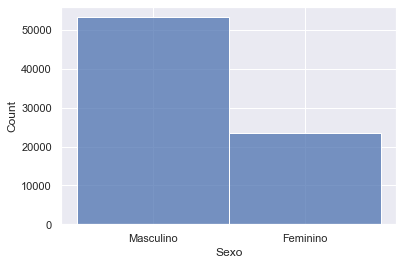

In [7]:
#Gráfico absoluto
sns.histplot(data=dfg, x='Sexo')

<AxesSubplot:xlabel='Sexo', ylabel='Density'>

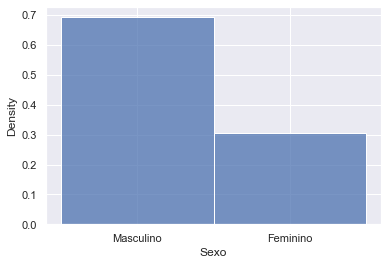

In [8]:
# grafico percentual
sns.histplot(data=dfg, x='Sexo', stat='density')

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável Sexo cruzada com os dados de Cor

In [9]:
fiCor = df['Sexo'].groupby(df['Cor']).value_counts()
frCor = df['Sexo'].groupby(df['Cor']).value_counts() / df.shape[0]
fpCor = frCor * 100

dist_freq_sexo_cor = pd.DataFrame({'Frequência Absoluta (fi)': fiCor, 'Frequência Percentual (fp)': fpCor})
dist_freq_sexo_cor['Frequência Acumulada (fa)']  = dist_freq_sexo_cor['Frequência Percentual (fp)'].cumsum()
dist_freq_sexo_cor.rename(index={0:'Masculino'}, level = 1, inplace=True)
dist_freq_sexo_cor.rename(index={1:'Feminino'}, level = 1, inplace=True)
dist_freq_sexo_cor.rename(index={0:'Indígena'}, level = 0, inplace=True)
dist_freq_sexo_cor.rename(index={2:'Branca'}, level = 0, inplace=True)
dist_freq_sexo_cor.rename(index={4:'Preta'}, level = 0, inplace=True)
dist_freq_sexo_cor.rename(index={6:'Amarela'}, level = 0, inplace=True)
dist_freq_sexo_cor.rename(index={8:'Parda'}, level = 0, inplace=True)
dist_freq_sexo_cor.rename(index={9:'Sem dados'}, level = 0, inplace=True)
dist_freq_sexo_cor

Frequência Absoluta (fi)  Frequência Percentual (fp)  \
Cor      Sexo                                                              
Amarela  Masculino                       235                    0.305830   
         Feminino                        117                    0.152264   
Branca   Masculino                     22194                   28.883394   
         Feminino                       9621                   12.520822   
Indígena Masculino                       256                    0.333160   
         Feminino                        101                    0.131442   
Parda    Masculino                     25063                   32.617126   
         Feminino                      10862                   14.135867   
Preta    Masculino                      5502                    7.160333   
         Feminino                       2889                    3.759761   

                    Frequência Acumulada (fa)  
Cor      Sexo                                  
Amarela  Masculino                   0.305830  
         Feminino                    0.458095  
Branca   Masculino                  29.341489  
         Feminino                   41.862311  
Indígena Masculino                  42.195471  
         Feminino                   42.326913  
Parda    Masculino                  74.944040  
         Feminino                   89.079906  
Preta    Masculino                  96.240239  
         Feminino                  100.000000

<AxesSubplot:xlabel='Sexo', ylabel='Count'>

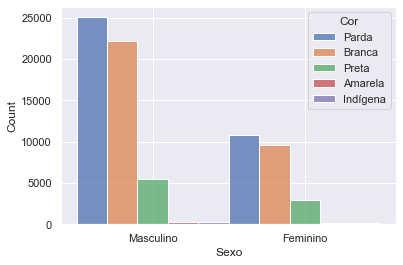

In [40]:
# grafico absoluto
sns.histplot(data=dfg, x = 'Sexo', hue='Cor', multiple="dodge", discrete=True)

<AxesSubplot:xlabel='Sexo', ylabel='Density'>

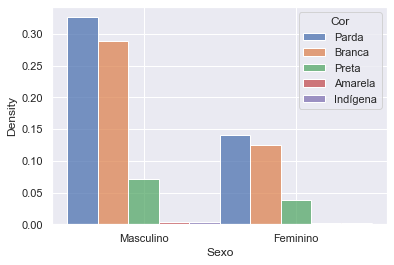

In [41]:
sns.histplot(data=dfg, x='Sexo', hue='Cor', stat='density', multiple="dodge", discrete=True)

## Distribuição de frequências para variáveis quantitativas (classes personalizadas)
***

###  Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso, <b>R$ 788,00</b> (considerando o ano de 2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [12]:
dfg['SM']  = ''

In [13]:
dfg['SM'].iloc[dfg['Renda'] <= 1576] = 'E'
dfg['SM'].iloc[(dfg['Renda'] > 1576) & (dfg['Renda'] <= 3152)] = 'D'
dfg['SM'].iloc[(dfg['Renda'] > 3152) & (dfg['Renda'] <= 7880)] = 'C'
dfg['SM'].iloc[(dfg['Renda'] > 7880) & (dfg['Renda'] <= 15760)] = 'B'
dfg['SM'].iloc[(dfg['Renda'] > 15760)] = 'A'
dfg

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,SM
0,11,Masculino,23,Parda,12,800,1.603808,E
1,11,Feminino,23,Branca,12,1150,1.739790,E
2,11,Feminino,35,Parda,15,880,1.760444,E
3,11,Masculino,46,Branca,6,3500,1.783158,C
4,11,Feminino,47,Parda,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,Feminino,46,Branca,11,812,1.687030,E
76836,53,Masculino,30,Preta,7,1500,1.792934,E
76837,53,Masculino,32,Parda,12,1300,1.830587,E
76838,53,Masculino,57,Parda,4,1500,1.726344,E


### Criar um dataframe que contenha essas classes personalizadas, utilizando o `pd.cut`.

In [14]:
dfRenda = df
dfRenda['SM'] = pd.cut(dfRenda['Renda'], bins = [0, 1576, 3152, 7880, 15760, dfRenda['Renda'].max()], labels = list('EDCBA'))
dfRenda['SM'] = dfRenda['SM'].astype(str)

dfRenda

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,SM
0,11,Masculino,23,Parda,12,800,1.603808,E
1,11,Feminino,23,Branca,12,1150,1.739790,E
2,11,Feminino,35,Parda,15,880,1.760444,E
3,11,Masculino,46,Branca,6,3500,1.783158,C
4,11,Feminino,47,Parda,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,Feminino,46,Branca,11,812,1.687030,E
76836,53,Masculino,30,Preta,7,1500,1.792934,E
76837,53,Masculino,32,Parda,12,1300,1.830587,E
76838,53,Masculino,57,Parda,4,1500,1.726344,E


### Criar a tabela de distribuição de frequências do dataframe obtido acima.

In [15]:
fi = dfRenda['SM'].value_counts()
fr = dfRenda['SM'].value_counts() / dfRenda.shape[0]
fp = fr * 100

#tabela
dist_freq_renda = pd.DataFrame({'Frequência Absoluta (fi)': fi, 'Frequência Percentual (fp)': fp})
dist_freq_renda['Frequência Acumulada (fa)']  = dist_freq_renda['Frequência Percentual (fp)'].cumsum()

dist_freq_renda

,Frequência Absoluta (fi),Frequência Percentual (fp),Frequência Acumulada (fa)
E,46888,61.020302,61.020302
D,16700,21.733472,82.753774
C,7599,9.889381,92.643155
B,2178,2.834461,95.477616
A,608,0.791255,96.268870


<AxesSubplot:>

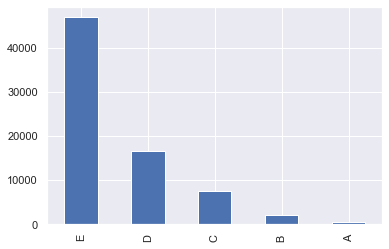

In [16]:
dfRenda['SM'].value_counts().plot(kind='bar')

## Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)
***

Obtenha a tabela e o gráfico de distribuições de frequências da variável de renda, mas, dessa vez, utilizando a Regra de Sturges para definir as classes de amplitude fixa.

### Definindo o número de classes e criando o dataframe com as classes

**Regra de Sturges**

$$k = 1 + \frac{10}{3}\log_{10}n$$

In [17]:
# 1. Definir o numero de amostras n
n = df.shape[0]

# 2. calcular o k
k = round(1 + 10 / 3 * np.log10(n))
print('k: ', k)

k:  17


### Criando a tabela e o gráfico de distribução de frequências

In [18]:
dfSturges = df
dfSturges['Renda'] = dfSturges['Renda'].astype(int)
dfSturges['SM'] = pd.cut(dfSturges['Renda'], bins = k, right = False, labels=('Q', 'P', 'O', 'N', 'M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'))
dfSturges['Renda'].replace(to_replace = 0, value = np.nan, inplace=True)
dfSturges = dfSturges.dropna()

In [19]:
fi = dfSturges['SM'].value_counts()
fr = dfSturges['SM'].value_counts() / dfSturges.shape[0]
fp = fr * 100
#tabela
dist_freq_renda = pd.DataFrame({'Frequência Absoluta (fi)': fi, 'Frequência Percentual (fp)': fp})
dist_freq_renda['Frequência Acumulada (fa)']  = dist_freq_renda['Frequência Percentual (fp)'].cumsum()
dist_freq_renda

,Frequência Absoluta (fi),Frequência Percentual (fp),Frequência Acumulada (fa)
Q,72727,98.315602,98.315602
P,1022,1.381585,99.697187
O,169,0.228462,99.925649
N,19,0.025685,99.951334
M,16,0.021630,99.972963
I,6,0.008111,99.981074
L,5,0.006759,99.987833
K,4,0.005407,99.993241
A,3,0.004056,99.997296
J,1,0.001352,99.998648


<AxesSubplot:xlabel='SM', ylabel='Count'>

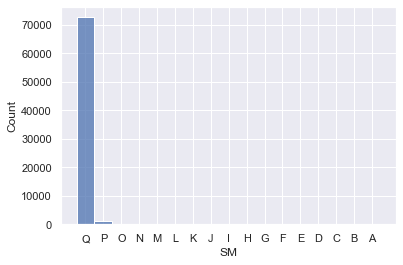

In [20]:
sns.histplot(data=dfSturges, x='SM')

<AxesSubplot:xlabel='SM', ylabel='Density'>

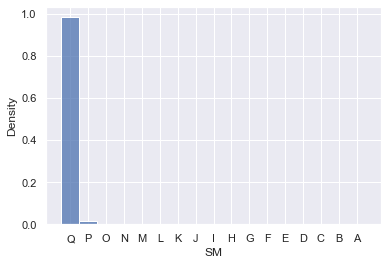

In [21]:
sns.histplot(data=dfSturges, x='SM', stat='density')

#### Analisando os valores sem as categorias "P" e "Q"

Realizando um estudo à parte das categorias menores, que não chegam a constar nos gráficos, que podem ser condierados outliers.

In [22]:
dfSturges['Renda'].iloc[dfSturges['SM'] == 'Q'] = np.nan
dfSturges['Renda'].iloc[dfSturges['SM'] == 'P'] = np.nan
dfSturges = dfSturges.dropna()
dfSturges

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,SM
510,11,Masculino,27,Parda,11,45000.0,1.711432,N
990,11,Masculino,33,Branca,16,50000.0,1.632056,M
1583,12,Masculino,52,Branca,10,30000.0,1.614237,O
1943,12,Masculino,34,Parda,16,30000.0,1.660074,O
6107,15,Masculino,82,Branca,16,26000.0,1.778068,O
...,...,...,...,...,...,...,...,...
76643,53,Masculino,53,Parda,16,38000.0,1.836081,N
76652,53,Masculino,44,Branca,16,25000.0,1.643600,O
76653,53,Masculino,56,Parda,16,32000.0,1.781830,O
76829,53,Masculino,42,Parda,12,32000.0,1.788923,O


<AxesSubplot:xlabel='SM', ylabel='Count'>

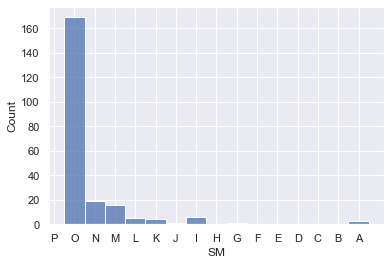

In [23]:
sns.histplot(data=dfSturges, x='SM')

<AxesSubplot:xlabel='SM', ylabel='Density'>

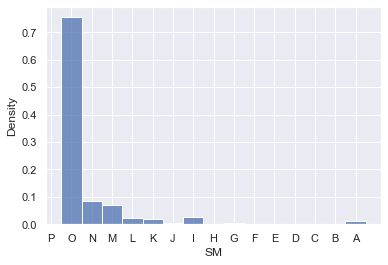

In [24]:
sns.histplot(data=dfSturges, x='SM', stat='density')

#  Medidas de Tendência Central
***

## Média aritmética

Calcule a média aritmética das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [25]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,SM
0,11,Masculino,23,Parda,12,800.0,1.603808,Q
1,11,Feminino,23,Branca,12,1150.0,1.739790,Q
2,11,Feminino,35,Parda,15,880.0,1.760444,Q
3,11,Masculino,46,Branca,6,3500.0,1.783158,Q
4,11,Feminino,47,Parda,9,150.0,1.690631,Q


In [26]:
mediaAnos = df['Anos de Estudo'].mean()
mediaIdade = df['Idade'].mean()
mediaRenda = df['Renda'].mean()
mediaAltura = df['Altura'].mean()
print(f'Média de Anos de Estudo: {mediaAnos}')
print(f'Média de Idade: {mediaIdade}')
print(f'Média de Renda: {mediaRenda}')
print(f'Média de Altura: {mediaAltura}')

Média de Anos de Estudo: 9.469664237376367
Média de Idade: 44.07142113482561
Média de Renda: 2077.9128195422654
Média de Altura: 1.6995124540575812


## Mediana

Calcule a mediana das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [27]:
medianaAnos = df['Anos de Estudo'].median()
medianaIdade = df['Idade'].median()
medianaRenda = df['Renda'].median()
medianaAltura = df['Altura'].median()
print(f'Mediana de Anos de Estudo: {medianaAnos}')
print(f'Mediana de Idade: {medianaIdade}')
print(f'Mediana de Renda: {medianaRenda}')
print(f'Mediana de Altura: {medianaAltura}')

Mediana de Anos de Estudo: 11.0
Mediana de Idade: 43.0
Mediana de Renda: 1200.0
Mediana de Altura: 1.6993247325


## Moda

Calcule a moda daquelas variáveis para as quais você imagina que faz sentido obter essa informação (com base no que vimos na aula).

In [28]:
modaAnos = df['Anos de Estudo'].mode()
modaIdade = df['Idade'].mode()
modaRenda = df['Renda'].mode()
modaAltura = df['Altura'].mode()
print(f'Moda de Anos de Estudo: {modaAnos}')
print(f'Moda de Idade: {modaIdade}')
print(f'Moda de Renda: {modaRenda}')
print(f'Moda de Altura: {modaAltura}')

Moda de Anos de Estudo: 0    12
dtype: int64
Moda de Idade: 0    40
dtype: int64
Moda de Renda: 0    788.0
dtype: float64
Moda de Altura: 0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64


## Relação entre média, mediana e moda
***

Como fizemos durante a aula, avalie a relação entre a média, mediana e moda de algumas variáveis do seu conjunto de dados.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avalie a variável `Renda`

`Renda`: Variável assimétrica à direita, dada média > mediana > moda

### Avalie a variável `Altura`

`Altura`: Variável simétrica, com valores de média, mediana e moda praticamente iguais.

### Avalie a variável `Anos de estudo`

`Anos de Estudo`: Variável assimetrica à esquerda, com média < mediana < moda

# Medidas Separatrizes
***

## Quartis, decis e percentis

Calcule os quartis, decis e percentis para a variável `Renda`.

In [45]:
Q1 = df['Renda'].quantile(0.25)
Q2 = df['Renda'].quantile(0.5)
Q3 = df['Renda'].quantile(0.75)
Q4 = df['Renda'].quantile(1)
print(f'Primeiro quartil: {Q1}')
print(f'Segundo quartil: {Q2}')
print(f'Terceiro quartil: {Q3}')
print(f'Quato quartil: {Q4}')

Primeiro quartil: 788.0
Segundo quartil: 1200.0
Terceiro quartil: 2000.0
Quato quartil: 200000.0


In [30]:
# Decis
df['Renda'].quantile([i/10 for i in range(1, 11)])

0.1       500.0
0.2       788.0
0.3       812.0
0.4      1000.0
0.5      1200.0
0.6      1500.0
0.7      2000.0
0.8      2500.0
0.9      4000.0
1.0    200000.0
Name: Renda, dtype: float64

In [31]:
# Percentis
df['Renda'].quantile([i/100 for i in range(1, 101)])

0.01       100.00
0.02       150.00
0.03       200.00
0.04       250.00
0.05       300.00
          ...    
0.96      7159.32
0.97      8592.00
0.98     10000.00
0.99     15000.00
1.00    200000.00
Name: Renda, Length: 100, dtype: float64

## Boxplot

Crie o boxplot para as variáveis `Renda`, `Altura`.

### Boxplot Renda

<AxesSubplot:xlabel='Renda'>

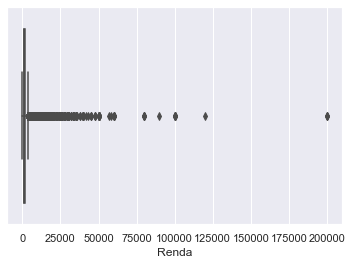

In [32]:
sns.boxplot(x='Renda', data=df)

### Boxplot Altura

<AxesSubplot:xlabel='Altura'>

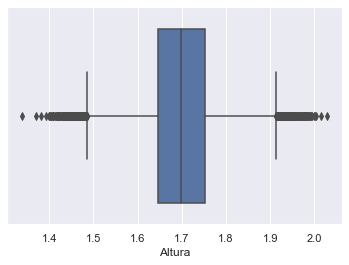

In [33]:
sns.boxplot(x='Altura', data=df)

# Medidas de Dispersão
***

Obtenha a variância e o desvio padrão das variáveis quantitativas do conjunto de dados. Em seguida, utilize o `seaborn` para plotar um gráfico de barras que exiba a média dessas variáveis quantitativas, em função da Unidade Federativa. Com o `seaborn` você também irá conseguir visualizar o desvio padrão da média para cada barra.

In [34]:
import statistics as st

## Variância e Desvio Padrão

In [35]:
varianciaAnos = st.pvariance(df['Anos de Estudo'])
varianciaIdade = st.pvariance(df['Idade'])
varianciaRenda = st.pvariance(df['Renda'])
varianciaAltura = st.pvariance(df['Altura'])
dpAnos = st.pstdev(df['Anos de Estudo'])
dpIdade = st.pstdev(df['Idade'])
dpRenda = st.pstdev(df['Renda'])
dpAltura = st.pstdev(df['Altura'])
print(f'Variância de Anos de Estudo: {varianciaAnos}')
print(f'Desvio padrão de Anos de Estudo: {dpAnos}')
print(f'Variância de Idade: {varianciaIdade}')
print(f'Desvio padrão de Idade: {dpIdade}')
print(f'Variância de Renda: {varianciaRenda}')
print(f'Desvio padrão de Renda: {dpRenda}')
print(f'Variância de Altura: {varianciaAltura}')
print(f'Desvio padrão de Altura: {dpAltura}')


Variância de Anos de Estudo: 20.61068827872624
Desvio padrão de Anos de Estudo: 4.539899589057696
Variância de Idade: 155.76293650197914
Desvio padrão de Idade: 12.48050225359457
Variância de Renda: nan
Desvio padrão de Renda: nan
Variância de Altura: 0.0063547859540754375
Desvio padrão de Altura: 0.0797169113430484


mediaAnos = df['Anos de Estudo'].mean()
mediaIdade = df['Idade'].mean()
mediaRenda = df['Renda'].mean()
mediaAltura = df['Altura'].mean()

## Gráficos de média por UF

### Média de Anos de Estudo

<AxesSubplot:xlabel='UF', ylabel='Anos de Estudo'>

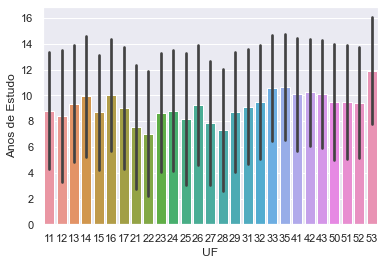

In [36]:
sns.barplot(data=df, x='UF', y = 'Anos de Estudo', ci='sd')

### Média de Idade

<AxesSubplot:xlabel='UF', ylabel='Idade'>

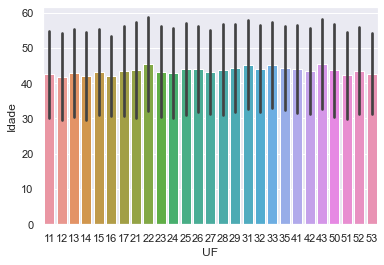

In [37]:
sns.barplot(data=df, x='UF', y = 'Idade', ci='sd')

### Média de Renda

<AxesSubplot:xlabel='UF', ylabel='Renda'>

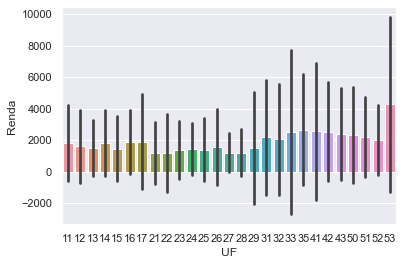

In [38]:
sns.barplot(data=df, x='UF', y = 'Renda', ci='sd')

### Média de Altura

<AxesSubplot:xlabel='UF', ylabel='Altura'>

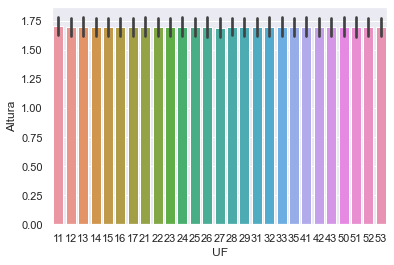

In [39]:
sns.barplot(data=df, x='UF', y = 'Altura', ci='sd')